# Recommendation System

### Objective:

- The objective of this assignment is to implement a recommendation system using cosine similarity on an anime dataset.

### Dataset:


- Use the Anime Dataset which contains information about various anime, including their titles, genres,No.of episodes and user ratings etc.

## Data Preprocessing -

- Load the dataset into a suitable data structure 
- Handle missing values, if any. 
- Explore the dataset to understand its structure and attributes.

In [2]:
import pandas as pd

# Load the dataset
anime_df = pd.read_csv('anime.csv')

# Display basic information about the dataset
print(anime_df.info())
anime_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12017 entries, 0 to 12016
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12017 non-null  int64  
 1   name      12017 non-null  object 
 2   genre     12017 non-null  object 
 3   type      12017 non-null  object 
 4   episodes  12017 non-null  object 
 5   rating    12017 non-null  float64
 6   members   12017 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 657.3+ KB
None


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
# Check for missing values
print(anime_df.isnull().sum())

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64


In [4]:
anime_df.dropna(subset=['rating', 'genre'], inplace=True)

anime_df.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [5]:
# Summary statistics
print(anime_df.describe())

# Explore unique genres
print(anime_df['genre'].unique())

           anime_id        rating       members
count  12017.000000  12017.000000  1.201700e+04
mean   13638.001165      6.478264  1.834888e+04
std    11231.076675      1.023857  5.537250e+04
min        1.000000      1.670000  1.200000e+01
25%     3391.000000      5.890000  2.250000e+02
50%     9959.000000      6.570000  1.552000e+03
75%    23729.000000      7.180000  9.588000e+03
max    34519.000000     10.000000  1.013917e+06
['Drama, Romance, School, Supernatural'
 'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen'
 'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen' ...
 'Action, Comedy, Hentai, Romance, Supernatural' 'Hentai, Sports'
 'Hentai, Slice of Life']


In [6]:
# Explore unique values in categorical columns
print(anime_df['members'].value_counts())


60       36
72       36
74       32
67       31
93       31
         ..
2694      1
40858     1
30766     1
96718     1
40318     1
Name: members, Length: 6596, dtype: int64


In [7]:
anime_df.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

In [10]:
# Impute missing values with the mean
anime_df['members'].fillna(anime_df['members'].mean(), inplace=True)

# Impute missing values with the mode
anime_df['members'].fillna(anime_df['members'].mode()[0], inplace=True)

# Delete rows with missing values
anime_df.dropna(inplace=True)

anime_df.to_csv('anime.csv', index=False)


In [11]:
# Display statistical summary for each variable
summary = anime_df.describe()

# Display the summary
print(summary)


           anime_id        rating       members
count  12017.000000  12017.000000  1.201700e+04
mean   13638.001165      6.478264  1.834888e+04
std    11231.076675      1.023857  5.537250e+04
min        1.000000      1.670000  1.200000e+01
25%     3391.000000      5.890000  2.250000e+02
50%     9959.000000      6.570000  1.552000e+03
75%    23729.000000      7.180000  9.588000e+03
max    34519.000000     10.000000  1.013917e+06


## Feature Extraction -

- Decide on the features that will be used for computing similarity (e.g., genres, user ratings).
- Convert categorical features into numerical representations if necessary.
- Normalize numerical features if required.


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler

# Convert genres into a numerical representation using TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')
anime_df['genre'] = anime_df['genre'].fillna('')
tfidf_matrix = tfidf.fit_transform(anime_df['genre'])

# Normalize the rating column
scaler = MinMaxScaler()
anime_df['rating'] = scaler.fit_transform(anime_df[['rating']])


In [13]:
from scipy.sparse import hstack

# Combine the TF-IDF matrix with the normalized ratings
features_matrix = hstack([tfidf_matrix, anime_df[['rating']]])


In [14]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler

data = pd.read_csv('anime.csv')

# Convert categorical feature 'genre' to numerical representation
encoder = OneHotEncoder()
encoded_genre = encoder.fit_transform(data[['genre']])
encoded_genre_df = pd.DataFrame(encoded_genre.toarray(), columns=encoder.get_feature_names_out(['genre']))
data_encoded = pd.concat([data, encoded_genre_df], axis=1)
data_encoded.drop('genre', axis=1, inplace=True)

print(data_encoded)


       anime_id                                               name   type  \
0         32281                                     Kimi no Na wa.  Movie   
1          5114                   Fullmetal Alchemist: Brotherhood     TV   
2         28977                                           Gintama°     TV   
3          9253                                        Steins;Gate     TV   
4          9969                                      Gintama&#039;     TV   
...         ...                                                ...    ...   
12012      9316       Toushindai My Lover: Minami tai Mecha-Minami    OVA   
12013      5543                                        Under World    OVA   
12014      5621                     Violence Gekiga David no Hoshi    OVA   
12015      6133  Violence Gekiga Shin David no Hoshi: Inma Dens...    OVA   
12016     26081                   Yasuji no Pornorama: Yacchimae!!  Movie   

      episodes  rating  members  genre_Action  genre_Action, Adventure  \
0

## Recommendation System:

- Design a function to recommend anime based on cosine similarity.
- Given a target anime, recommend a list of similar anime based on cosine similarity scores.
- Experiment with different threshold values for similarity scores to adjust the recommendation list size.

In [15]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


def recommend_anime(target_anime, anime_data, threshold=0.5, top_n=5):
    # Calculate cosine similarity
    target_features = anime_data_encoded.loc[anime_data_encoded['name'] == target_anime].drop(['name', 'anime_id'], axis=1)
    anime_features = anime_data_encoded.drop(['name', 'anime_id'], axis=1)
    similarity_scores = cosine_similarity(target_features, anime_features).flatten()
    
    # Sort similarity scores
    sorted_indices = similarity_scores.argsort()[::-1]
    
    # Filter recommendations based on threshold
    recommended_indices = [i for i in sorted_indices if similarity_scores[i] > threshold]
    
    # Return top N recommendations
    recommendations = anime_data_encoded.iloc[recommended_indices[:top_n]]['name'].tolist()
    return recommendations


## Visualization

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


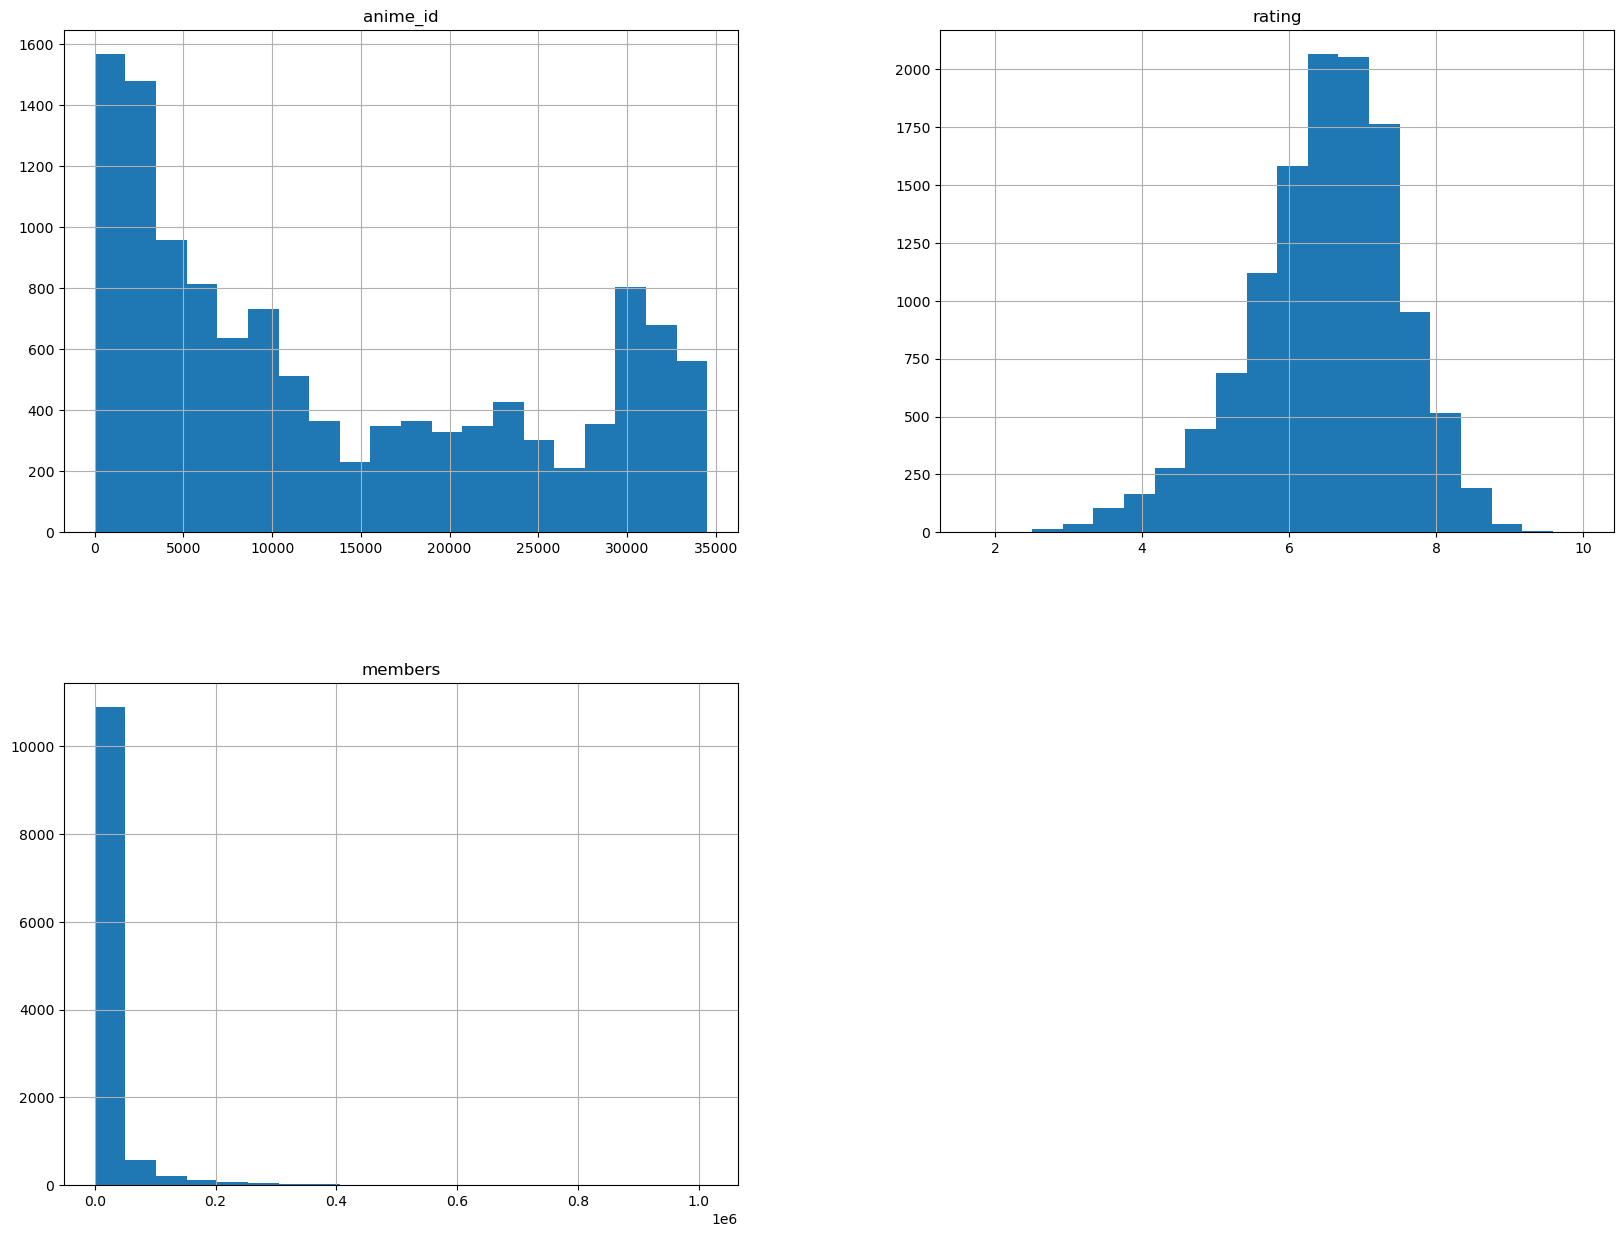

In [17]:
data = pd.read_csv('anime.csv')

# 1. histogram
data.hist(bins=20, figsize=(20, 15))
plt.show()


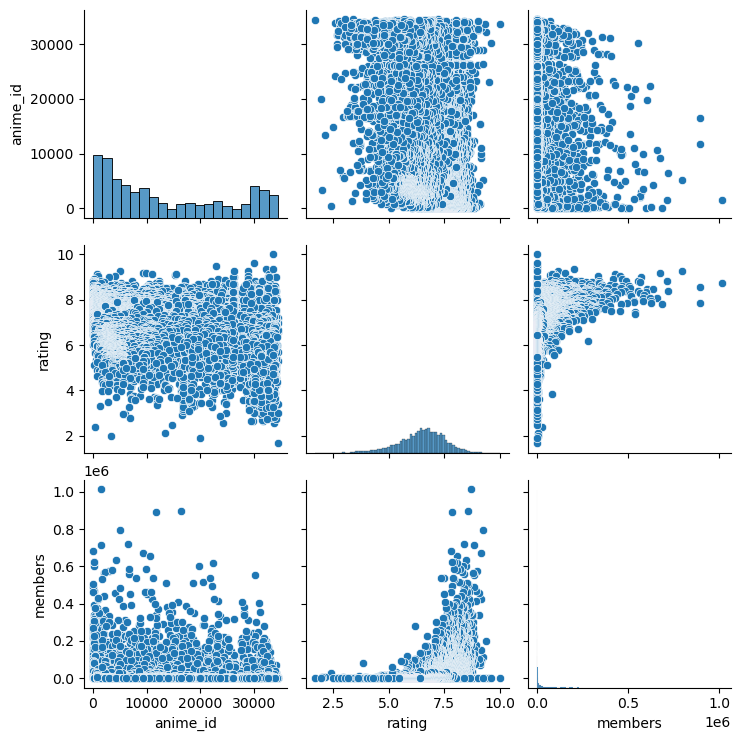

In [19]:
# 2. Pairplot
sns.pairplot(data)
plt.show()

C:\Users\prana\AppData\Local\Temp\ipykernel_1908\3231052763.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


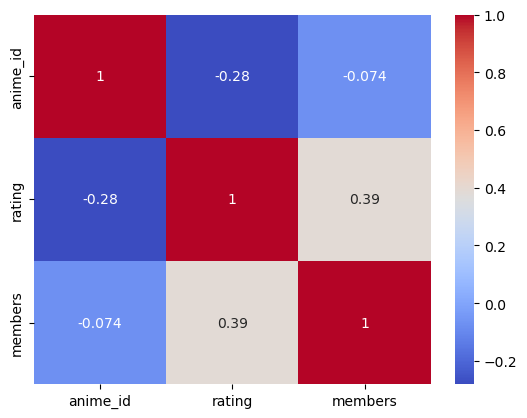

In [20]:
# 3. Heatmap
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


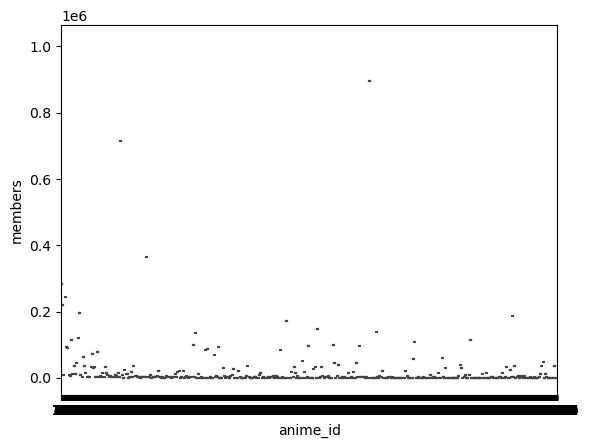

In [21]:
# 4. Boxplot
sns.boxplot(x='anime_id', y='members', data=data)
plt.show()


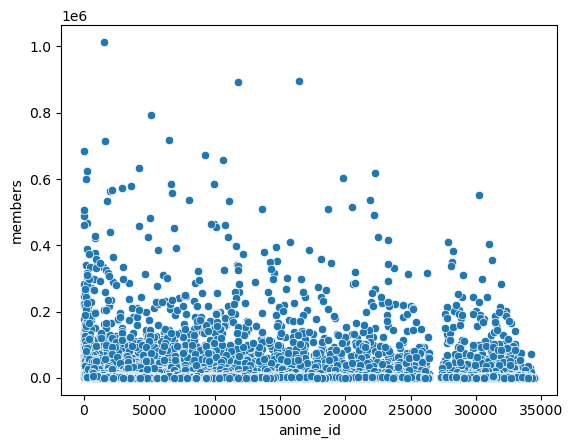

In [23]:
# 5. Scatterplot
sns.scatterplot(x='anime_id', y='members', data=data)
plt.show()

## Evaluation -

- Split the dataset into training and testing sets.
- Evaluate the recommendation system using appropriate metrics such as precision, recall, and F1-score.
- Analyze the performance of the recommendation system and identify areas of improvement.

    

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Evaluate the recommendation system
def evaluate_recommender(train_data, test_data, threshold=0.5, top_n=5):
    if test_data.empty:
        return 0, 0, 0  # Return zero scores if the testing set is empty

    # Train the recommendation system on the training data (assuming the function is called train_recommender)
    # train_recommender(train_data)
    
    # Evaluate the recommendation system on the testing data
    predictions = []
    for target_anime in test_data['name']:
        recommendations = recommend_anime(target_anime, train_data, threshold=threshold, top_n=top_n)
        predictions.append(recommendations)
    
    # Calculate evaluation metrics
    true_positives = 0
    false_positives = 0
    false_negatives = 0
    for i, target_anime in enumerate(test_data['name']):
        for recommendation in predictions[i]:
            if recommendation in test_data.iloc[i]['similar_anime']:
                true_positives += 1
            else:
                false_positives += 1
        false_negatives += len(test_data.iloc[i]['similar_anime']) - true_positives

    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    f1 = 2 * (precision * recall) / (precision + recall)

    return precision, recall, f1
